In [1]:
import math
import numpy as np
import random as rand
from numba import jit,int64,float64
import matplotlib.pyplot as plt
%matplotlib inline

#To increase cell width:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Color-blind friendly colors to plot:
# CB_colors = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']
# CB_colors.reverse()
CB_colors = ['#00429d', '#93003a']

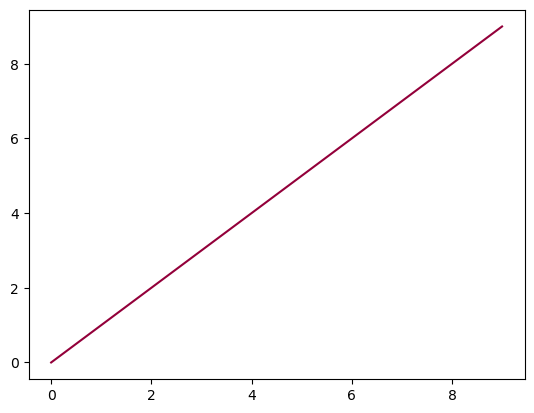

In [3]:
test1 = np.array([i for i in range(10)])
plt.plot(test1,test1,c=CB_colors[1])

There are two classes of environment, let's say black and white. In white environments, white cells are fitter, while black cells grow faster in black environments. [Overall growth rates higher in black? later] Cells may switch randomly between black and white.

In [100]:
#Discrete system:
time_steps = 100

#The sugar variable: 0 or 1, denotes which environment we live in:
sug = 0

#The parameters. K means how many timesteps it takes for the cells with regulations to find the true optimum:
K = 1
#Delta means how much faster the fit cells are growing compared to the suboptimal:
delta = 2
#Noise - the rate of switching between black and white cells:
alpha = 0.01

#Now, the sugar:
sug_dyn = np.concatenate((0*np.ones(int(time_steps/2)),1*np.ones(int(time_steps/2))))

In [101]:
#An array to store the number of black and white cells:
cell_array = np.ones((time_steps,2))
num_switching = 0

for t in range(1,time_steps):
    sug = sug_dyn[t]
    #Reproduction step - each fit cell divides into two and each unfit cell does so after some iterations:
    if (sug==0):
        cell_array[t,0] = 2*cell_array[t-1,0]
        if (t%delta==0):
            cell_array[t,1] = 2*cell_array[t-1,1]
        else:
            cell_array[t,1] = cell_array[t-1,1]
    #Reproduction step:
    elif (sug==1):
        cell_array[t,1] = 2*cell_array[t-1,1]
        if (t%delta==0):
            cell_array[t,0] = 2*cell_array[t-1,0]
        else:
            cell_array[t,0] = cell_array[t-1,0]
    #Switching step:
    cell_array[t,0],cell_array[t,1] = cell_array[t,0]+np.floor(alpha*cell_array[t,1]),cell_array[t,1]+np.floor(alpha*cell_array[t,0])
#     print(np.floor(alpha*cell_array[t,0]),np.floor(alpha*cell_array[t,1]))
    

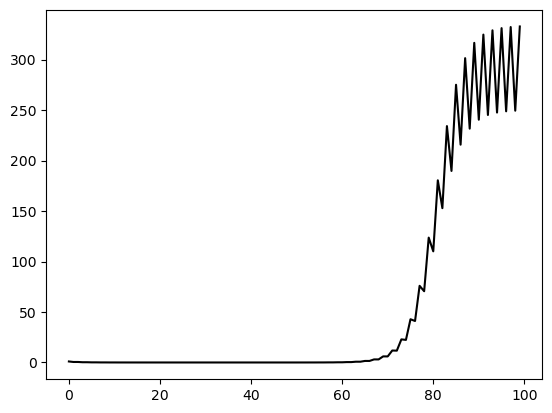

In [98]:
plt.plot(range(time_steps),cell_array[:,1]/cell_array[:,0],c='k')

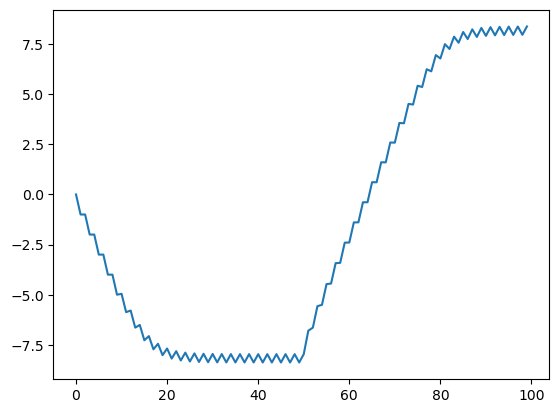

In [99]:
plt.plot(range(time_steps),np.log2(cell_array[:,1]/cell_array[:,0]))

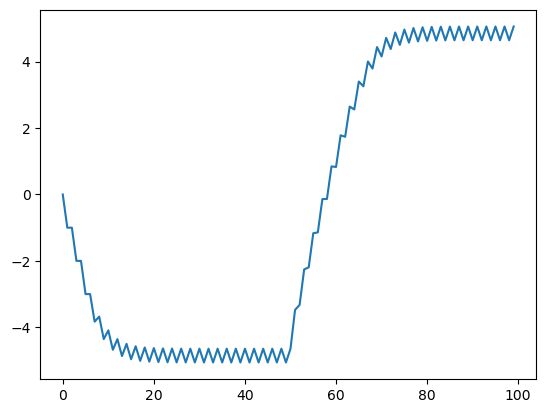

In [102]:
plt.plot(range(time_steps),np.log2(cell_array[:,1]/cell_array[:,0]))